## Helper Functions

In [ ]:
# Helper functions
import numpy as np
import numpy.linalg as LA
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

def plot_transformation(P_before, P_after, text_before, text_after, axis = [0, 5, 0, 4], arrows=False):
    if arrows:
        for vector_before, vector_after in zip(P_before.T, P_after.T):
            plot_vector2d(vector_before, color="blue", linestyle="--")
            plot_vector2d(vector_after, color="red", linestyle="-")
    plt.gca().add_artist(Polygon(P_before.T, alpha=0.2))
    plt.gca().add_artist(Polygon(P_after.T, alpha=0.3, color="r"))
    plt.text(P_before[0].mean(), P_before[1].mean(), text_before, fontsize=18, color="blue")
    plt.text(P_after[0].mean(), P_after[1].mean(), text_after, fontsize=18, color="red")
    plt.axis(axis)
    plt.grid()

## Singular Value Decomposition
Remember we have covered the concept of eigenvalues/vectors in the [Linear Algebra Primer](https://colab.research.google.com/drive/1xZlzwQv6FYMOliAVqtOQAMttT6FBli_6?usp=sharing) 

An **eigenvector** of a square matrix $M$ (also called a **characteristic vector**) is a non-zero vector that remains on the same line after transformation by the linear transformation associated with $M$. A more formal definition is any vector $v$ such that:

$M \cdot v = \lambda \times v$

Where $\lambda$ is a scalar value called the **eigenvalue** associated to the vector $v$.

---


One can generalize eigenvalues/vectors to non-square matrices, in which case they are called singular vectors and singular values. There are now both left and right singular values and vectors.


$M = U \cdot \Sigma \cdot V^{T}$


It turns out that any $m \times n$ matrix $M$ can be decomposed into the dot product of three simple matrices:
* a rotation matrix $U$ (an $m \times m$ orthogonal matrix). Columns of $U$ are the left singular vectors of $M$.
* a scaling & projecting matrix $\Sigma$ (an $m \times n$ diagonal matrix). Diagonal elements of $\Sigma$ are the singular values of $M$.
* and another rotation matrix $V^T$ (an $n \times n$ orthogonal matrix). columns of $V$ are the right singular vectors of $M$.


For example, let's use NumPy's SVD implementation to decompose the [shear mapping matrix](https://en.wikipedia.org/wiki/Shear_mapping)

Let's first look at how this transformation affects the **unit square**: 

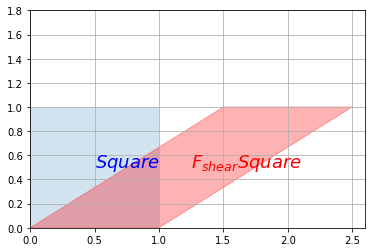

In [ ]:
F_shear = np.array([
        [1, 1.5],
        [0, 1]
    ])

Square = np.array([
        [0, 0, 1, 1],
        [0, 1, 1, 0]
    ])
plot_transformation(Square, F_shear.dot(Square), "$Square$", "$F_{shear} Square$",
                    axis=[0, 2.6, 0, 1.8])
plt.show()

In [ ]:
U, S_diag, V_T = LA.svd(F_shear) # note: in python 3 you can rename S_diag to Σ_diag
U

array([[ 0.89442719, -0.4472136 ],
       [ 0.4472136 ,  0.89442719]])

In [ ]:
S_diag

array([2. , 0.5])

Note that this is just a 1D array containing the diagonal values of Σ. To get the actual matrix Σ, we can use NumPy's `diag` function:

In [ ]:
S = np.diag(S_diag)
S

array([[2. , 0. ],
       [0. , 0.5]])

Now let's check that $U \cdot \Sigma \cdot V^T$ is indeed equal to `F_shear`:

In [ ]:
U.dot(np.diag(S_diag)).dot(V_T)

array([[ 1.00000000e+00,  1.50000000e+00],
       [-1.25949234e-17,  1.00000000e+00]])

In [ ]:
F_shear

array([[1. , 1.5],
       [0. , 1. ]])

It worked like a charm. Let's apply these transformations one by one (in reverse order) on the unit square to understand what's going on. First, let's apply the first rotation $V^T$:

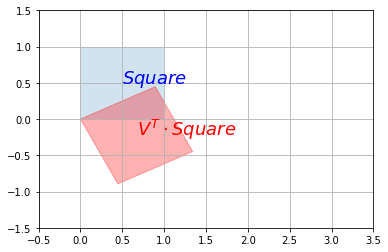

In [ ]:
plot_transformation(Square, V_T.dot(Square), "$Square$", "$V^T \cdot Square$",
                    axis=[-0.5, 3.5 , -1.5, 1.5])
plt.show()

Now let's rescale along the vertical and horizontal axes using $\Sigma$:

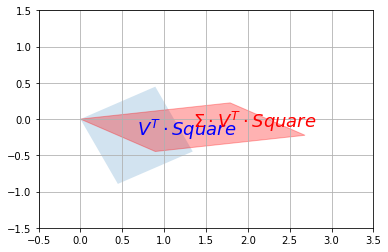

In [ ]:
plot_transformation(V_T.dot(Square), S.dot(V_T).dot(Square), "$V^T \cdot Square$", "$\Sigma \cdot V^T \cdot Square$",
                    axis=[-0.5, 3.5 , -1.5, 1.5])
plt.show()

Finally, we apply the second rotation $U$:

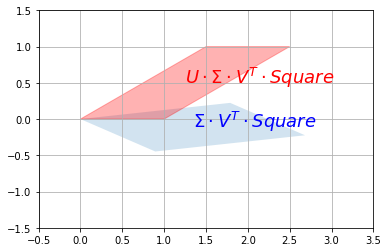

In [ ]:
plot_transformation(S.dot(V_T).dot(Square), U.dot(S).dot(V_T).dot(Square),"$\Sigma \cdot V^T \cdot Square$", "$U \cdot \Sigma \cdot V^T \cdot Square$",
                    axis=[-0.5, 3.5 , -1.5, 1.5])
plt.show()

And we can see that the result is indeed a shear mapping of the original unit square.

##How this all relates to PCA

Principle Components Analysis works by finding the eigenvalues and eigenvectors of a dataset's covariance matrix. However, when working with large sets of data, the computational complexity involved in normal eigen-decomposition can be prohibitive and potentially cause errors due to rounding at various points in the process. 

Luckily, mathmeticians have found ways of computing the singular value decompisition that are both stable and less computationally complex. We can then extract the eigenvalues and eigenvectors from the SVD:

The eigenvalues $\lambda_{i} = \sigma_i^2/n-1$, where $\sigma$ corresponds to the singular values, or the elements in our diagonal matrix $\Sigma$. The eigenvectors are the corresponding right singular vectors found in $V$.

Indeed, Scikit Learn uses SVD in its pca object to calculate principal components.

For a more detailed look at both SVD and its relationship to PCA (as well as a brief proof of the relationship above), check out [this article](https://towardsdatascience.com/singular-value-decomposition-and-its-applications-in-principal-component-analysis-5b7a5f08d0bd)